<a href="https://colab.research.google.com/github/LexAguirre/Algoritmos-de-aprendizaje-profundo/blob/main/Versi%C3%B3n_2_Algoritmos_de_aprendizaje_profundo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos de aprendizaje profundo aplicado a entornos vehiculares para la detección de personas con discapacidades


Asesor: D. en C. Guerrero Ibáñez Juan Antonio

Co-asesor: D. en C. Contreras Castillo Juan José

In [ ]:
!nvidia-smi

Sun Apr 30 03:07:59 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.4/78.2 GB disk)


In [ ]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -qe ultralytics

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://static.miscota.com/consejos/wp-content/uploads/2016/10/shutterstock_222024406-FILEminimizer.jpg' save=True

/content
100% 6.23M/6.23M [00:00<00:00, 374MB/s]

2023-04-30 03:08:24.747892: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-30 03:08:25.830815: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
100% 310k/310k [00:00<00:00, 839kB/s]
image 1/1 /content/shutterstock_222024406-FILEminimizer.jpg: 448x640 1 dog, 1 backpack, 285.8ms
Speed: 9.4ms pre-process, 285.8ms inference, 498.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://m.media-amazon.com/images/I/71KQyAxyVgL._SL1500_.jpg' save=True

/content
2023-04-30 03:08:39.202348: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-30 03:08:40.180867: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
100% 160k/160k [00:00<00:00, 14.5MB/s]
image 1/1 /content/71KQyAxyVgL._SL1500_.jpg: 640x640 1 person, 1 bicycle, 7.9ms
Speed: 0.8ms pre-process, 7.9ms inference, 108.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2


/content


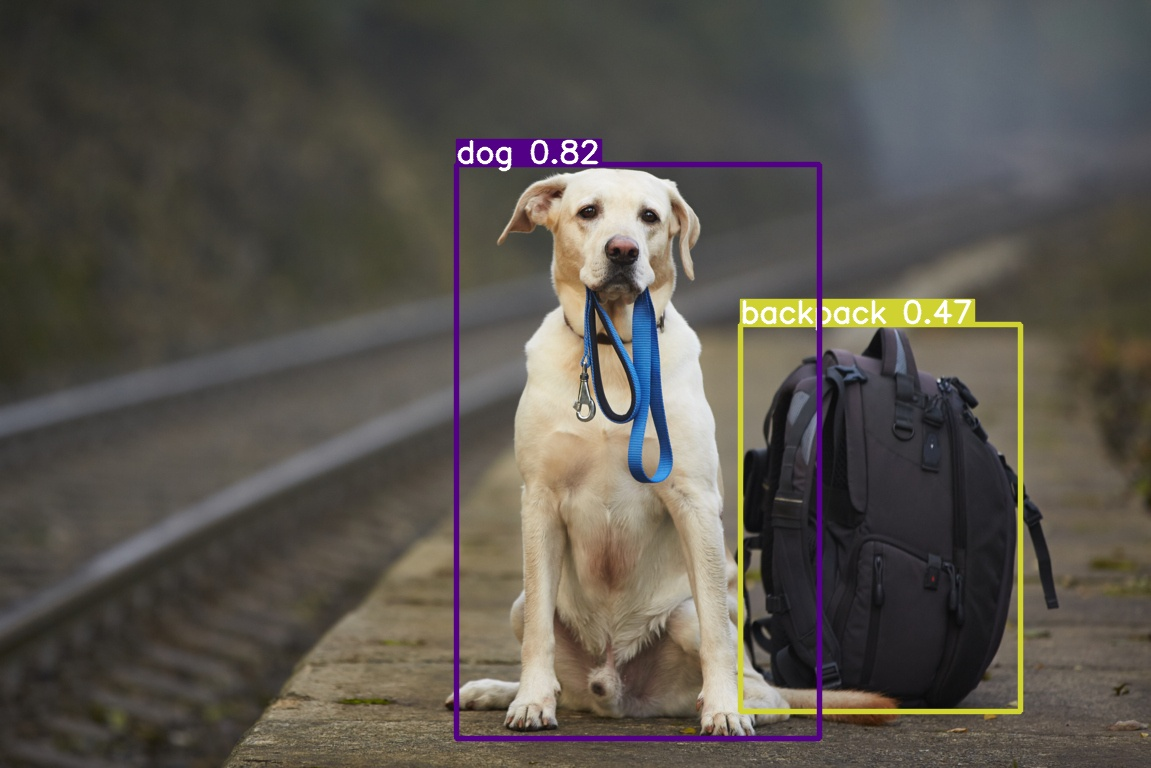

In [ ]:
%cd {HOME}
Image(filename='runs/detect/predict/shutterstock_222024406-FILEminimizer.jpg', height=600)

/content


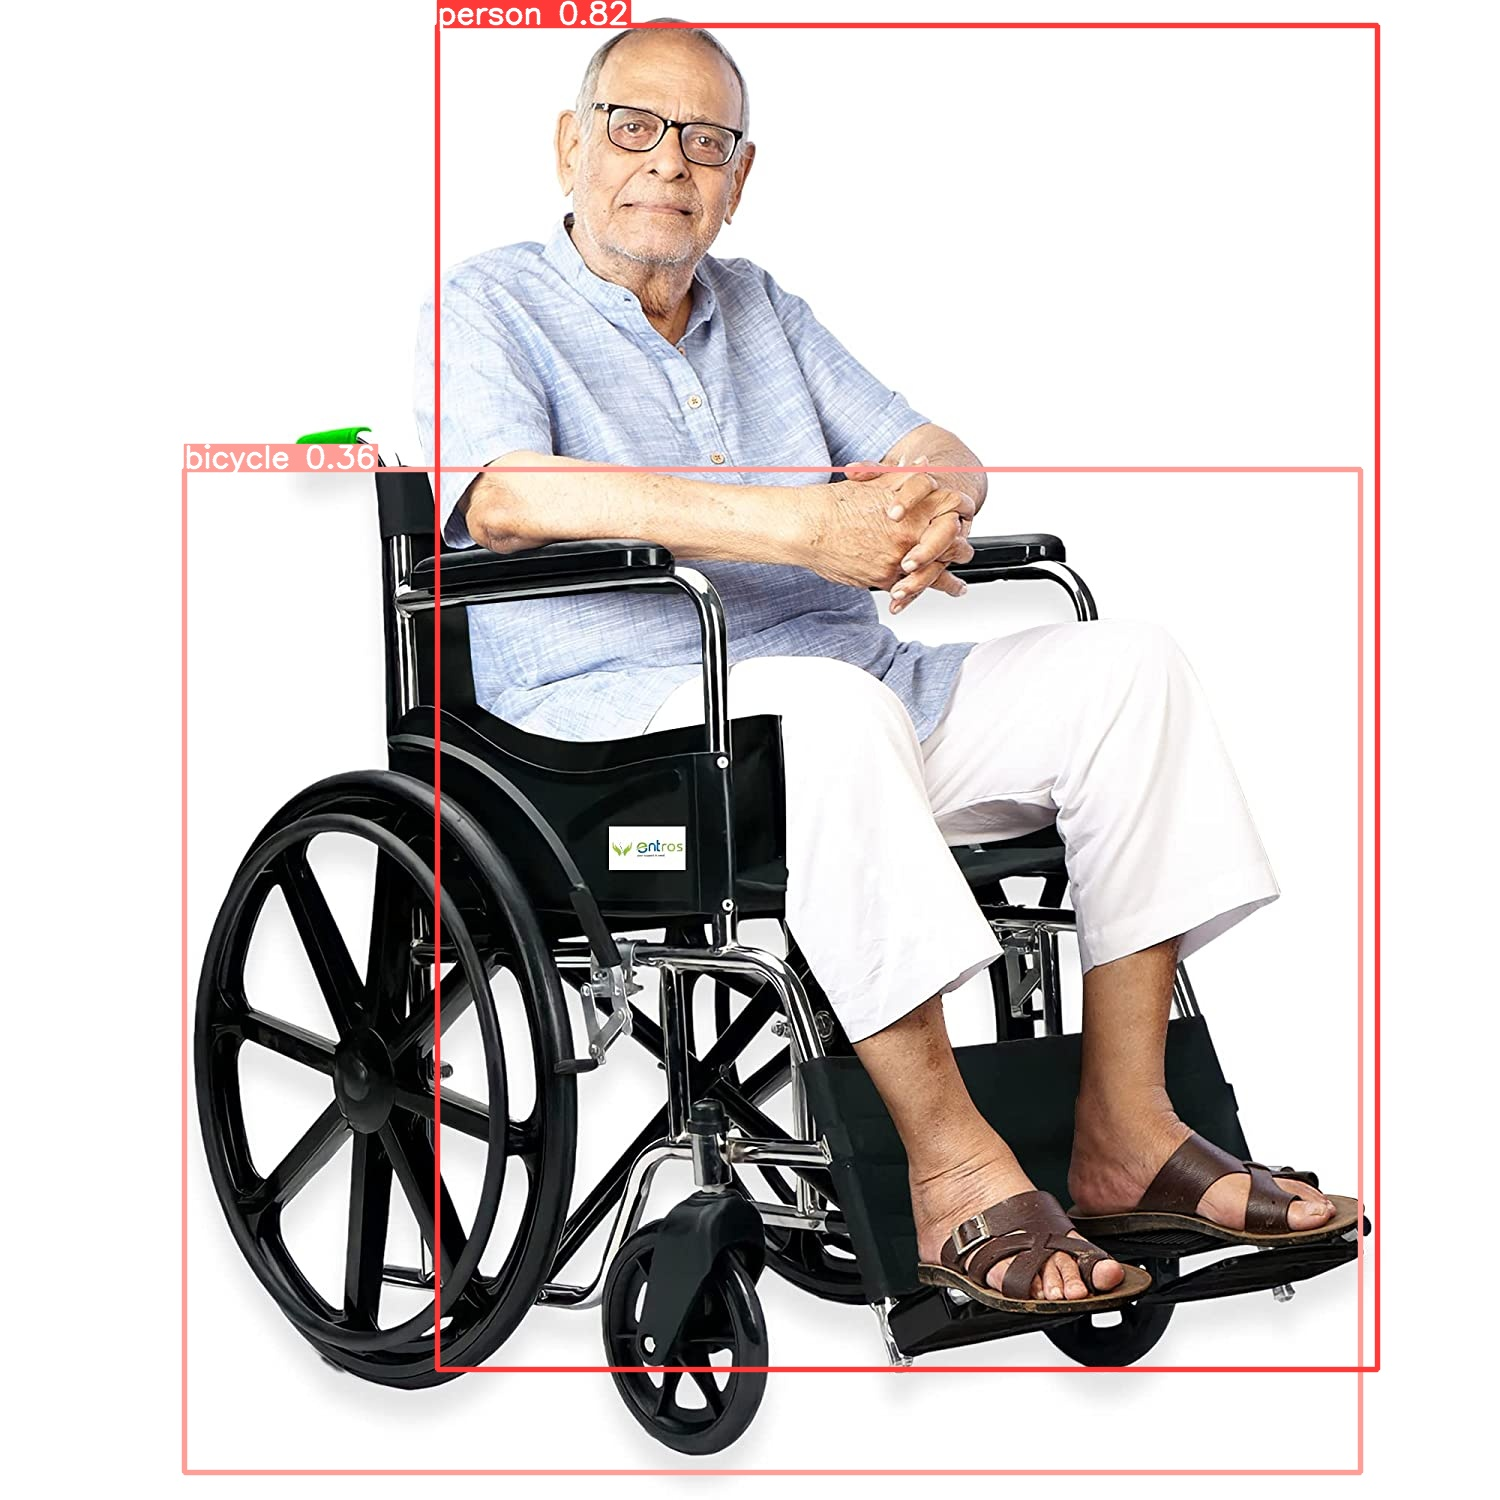

In [ ]:
%cd {HOME}
Image(filename='runs/detect/predict2/71KQyAxyVgL._SL1500_.jpg', height=600)

### 🐍 Python SDK

The simplest way of simply using YOLOv8 directly in a Python environment.

In [ ]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)

Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
100%|██████████| 104k/104k [00:00<00:00, 28.3MB/s]


In [ ]:
results[0].boxes.xyxy

tensor([[   0.,  314.,  625., 1278.],
        [  55.,  250.,  648., 1266.],
        [ 633.,  720.,  701.,  786.]], device='cuda:0')

In [ ]:
results[0].boxes.conf

tensor([0.72713, 0.29066, 0.28456], device='cuda:0')

In [ ]:
results[0].boxes.cls

tensor([ 0., 16.,  2.], device='cuda:0')

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="6ayNBfk3sVP1DOJkRRrH")
project = rf.workspace("detect-desabilities").project("road-users-disabilities")
dataset = project.version(1).download("yolov8")

/content/datasets
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.2/56.2 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.7 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9676 sha256=9bc082437d956787a9b68b572db6759a8930e2ab0da7ed40a656419ad65bce82
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstal

loading Roboflow workspace...
loading Roboflow project...

Extracting Dataset Version Zip to Road-users-disabilities-1 in yolov8:: 100%|██████████| 5312/5312 [00:01<00:00, 3062.90it/s]


## Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:01<00:00, 21.8MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/Road-users-disabilities-1/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscri

In [ ]:
!ls {HOME}/runs/detect/train/

/content


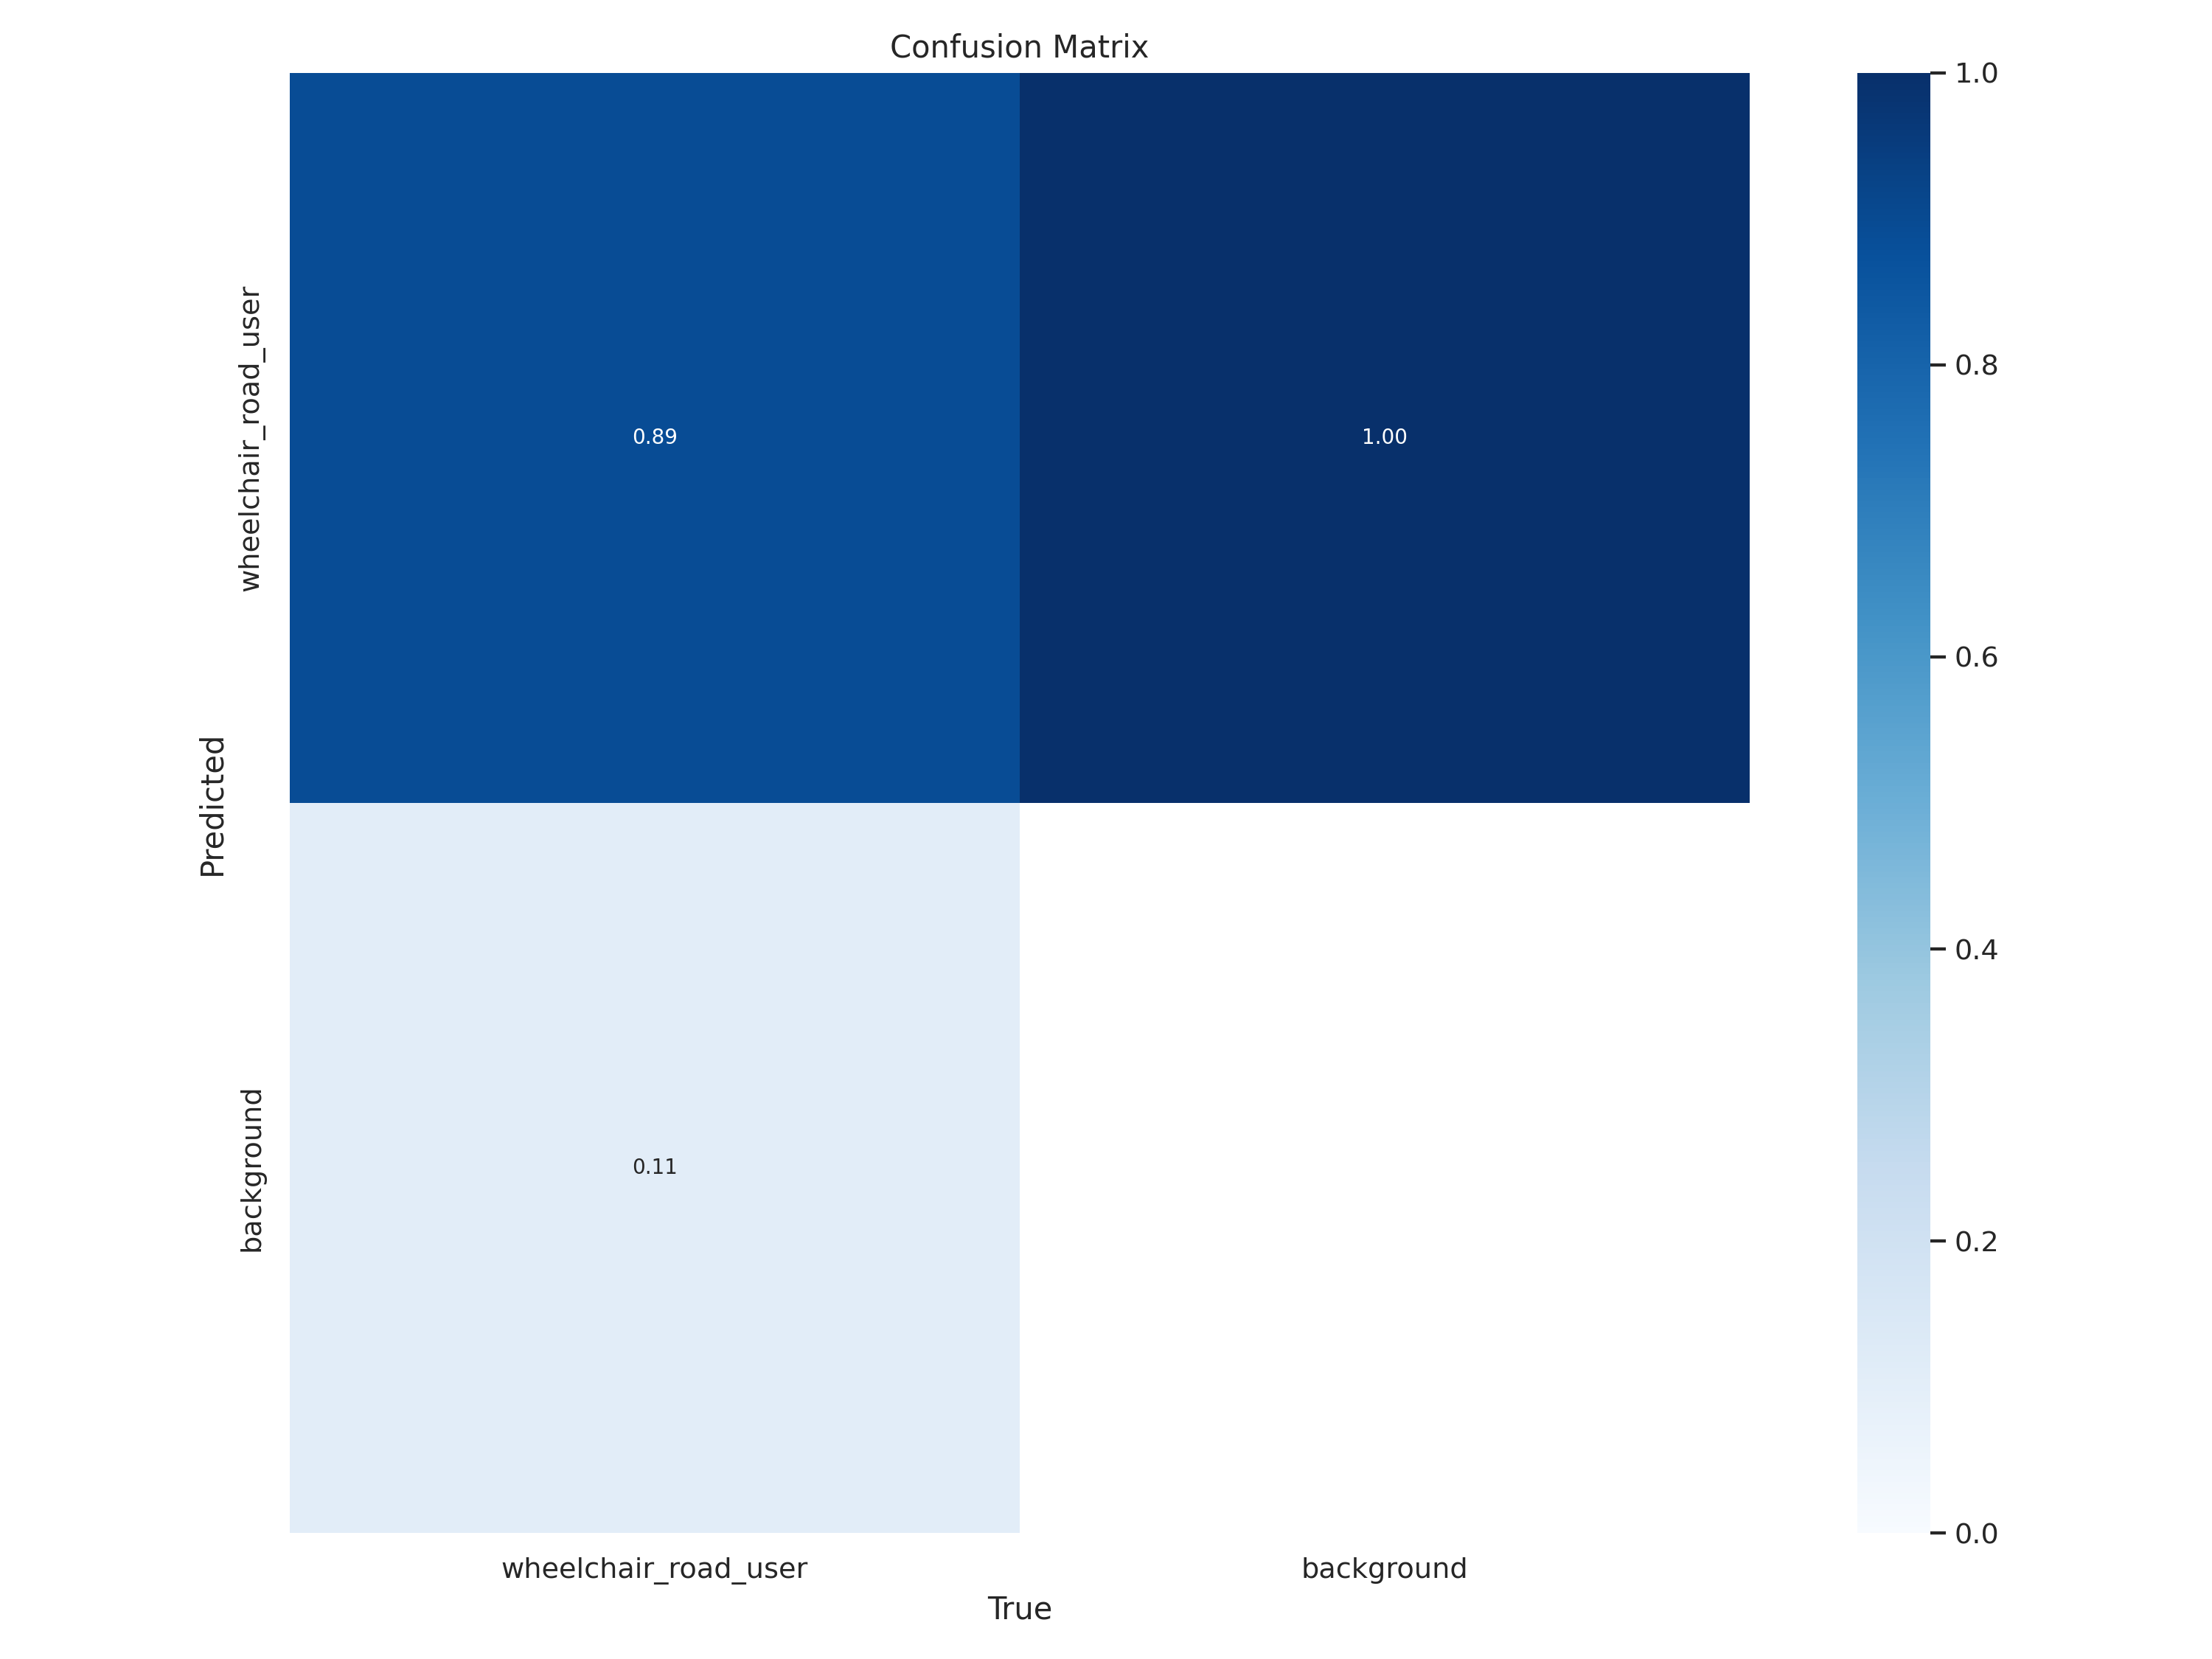

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


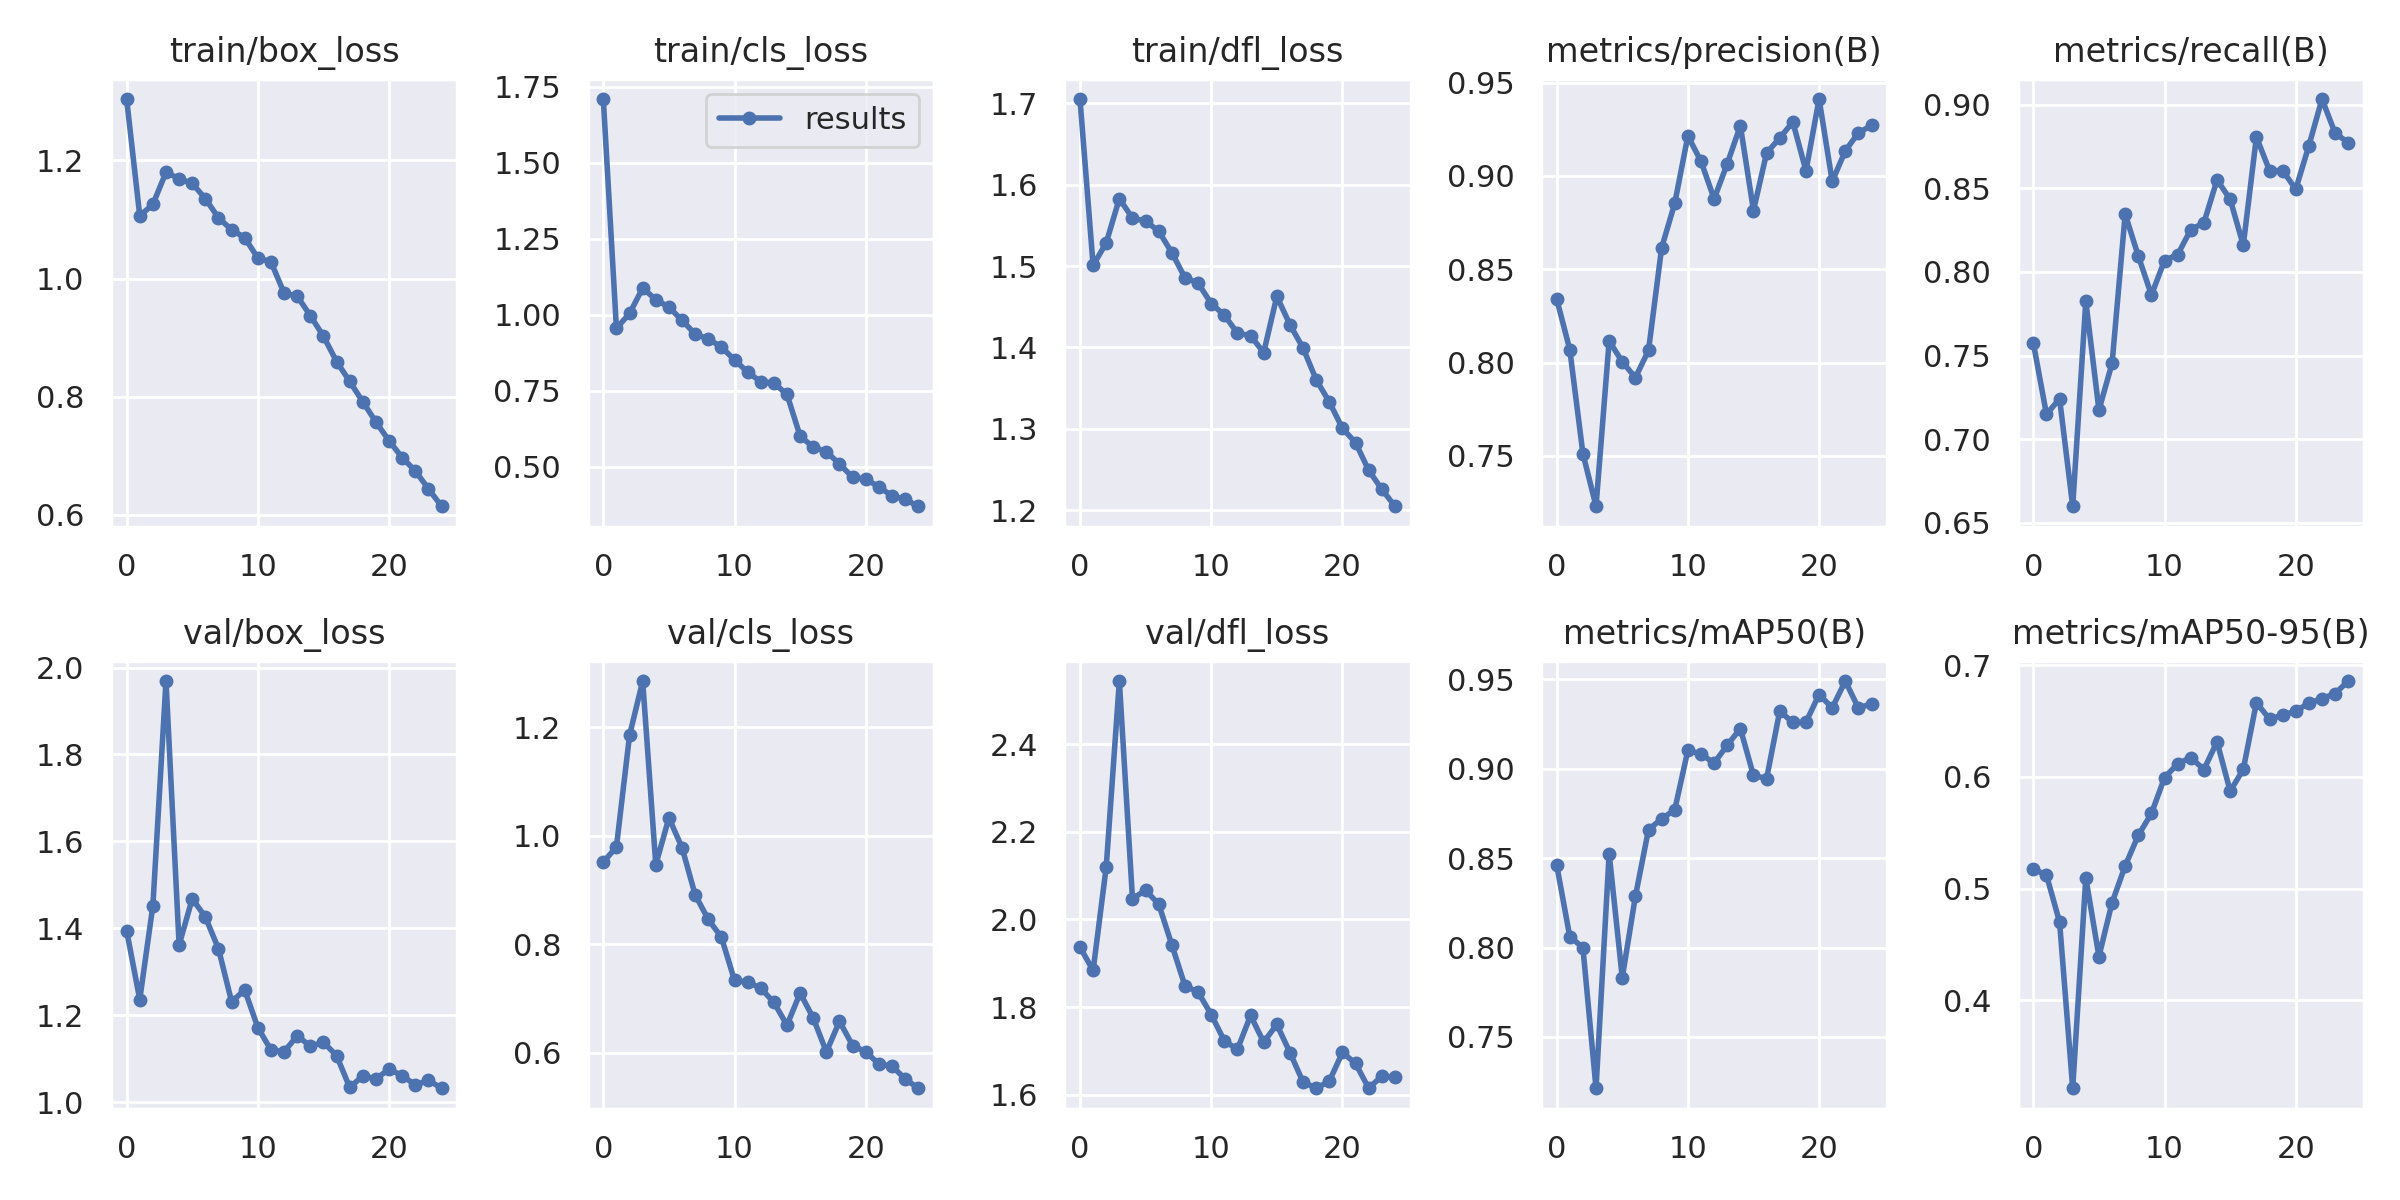

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


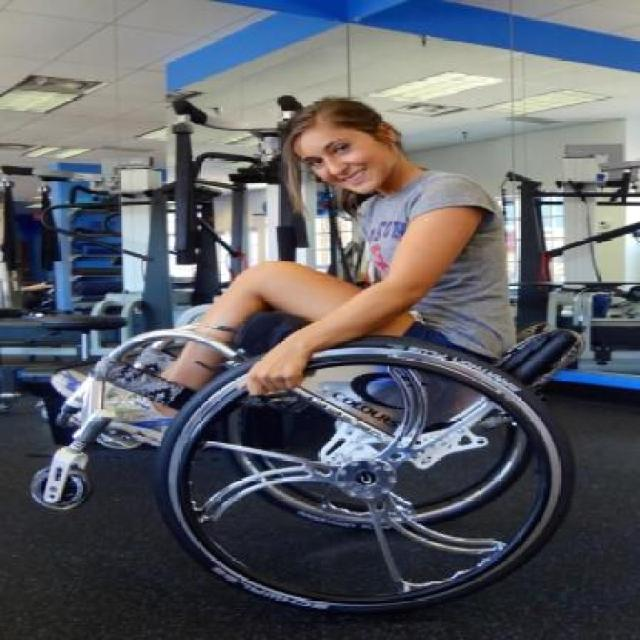

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/datasets/Road-users-disabilities-1/train/images/088082875e0b7f8a3317584d31b1b81e_jpg.rf.b2d9a35183f198750234258ba02244c9.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
2023-04-30 04:08:56.593276: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Road-users-disabilities-1/valid/labels.cache... 322 images, 0 backgrounds, 0 corrupt: 100% 322/322 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 21/21 [00:11<00:00,  1.90it/s]
                   all        322        538      0.925      0.877      0.936      0.684
Speed: 3.4ms pre-process, 15.1ms inference, 0.0ms loss, 3.2ms post-process per image


## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
2023-04-30 04:09:18.884179: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
image 1/243 /content/datasets/Road-users-disabilities-1/test/images/1182954247_4664_jpg.rf.6b1cf6daccb2151a3b7508acbdb0c4cc.jpg: 800x800 4 wheelchair_road_users, 24.6ms
image 2/243 /content/datasets/Road-users-disabilities-1/test/images/1339_83_permo1_600_jpg.rf.f0a3819529ddaef4d17bf5215d389bfb.jpg: 800x800 2 wheelchair_road_users, 24.6ms
image 3/243 /content/datasets/Road-users-disabilities-1/test/images/1_jpg.rf.7ad209bfc6def14e8eed78a6c8ee76f5.jpg: 800x800 7 wheelchair_road_users, 24.6ms
image 4/243 /content/datasets/Road-users-disabilities-1/test/images/2049_jpg.rf.7fd6cdecc52701ba9e026a5351e4ee00.jpg: 800x800 7 wheelchair_road_users, 25.6ms
image 5/243 /content/datasets/Road-users-disa

**NOTE:** Let's take a look at few results.

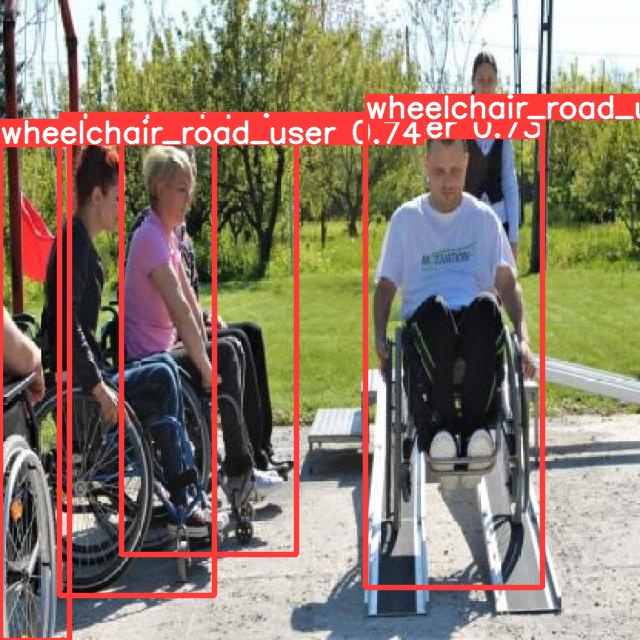

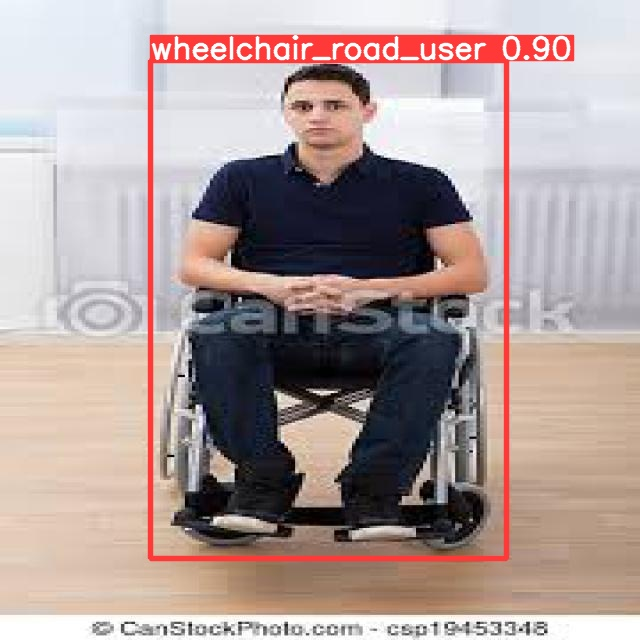

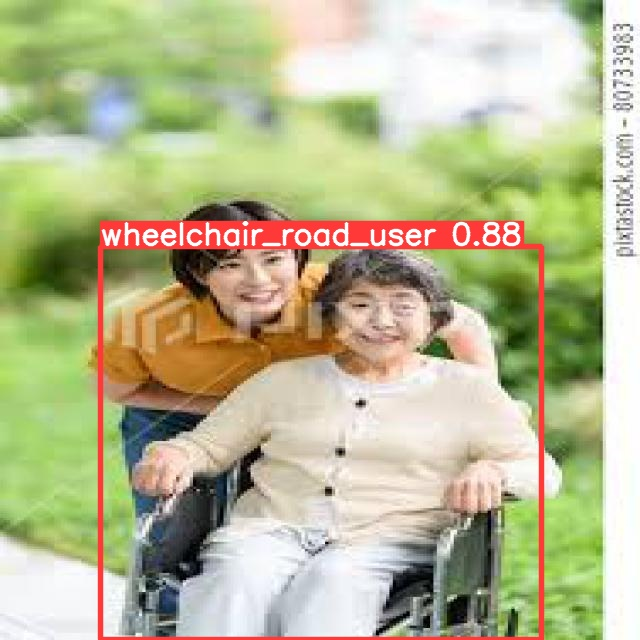

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

An error occured when getting the model upload URL: This version already has a trained model. Please generate and train a new version in order to upload model to Roboflow.


In [ ]:
#While your deployment is processing, checkout the deployment docs to take your model to most destinations https://docs.roboflow.com/inference

In [ ]:
#Run inference on your model on a persistant, auto-scaling, cloud API

#load model
model = project.version(dataset.version).model

#choose random test set image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred

running inference on ia_300000930_jpg.rf.f1e105f735e878fa046932ac19f57a92.jpg


{'predictions': [{'x': 267.0,
   'y': 427.5,
   'width': 410.0,
   'height': 371.0,
   'confidence': 0.8501189947128296,
   'class': 'wheelchair_road_user',
   'image_path': '/content/datasets/Road-users-disabilities-1/test/images/ia_300000930_jpg.rf.f1e105f735e878fa046932ac19f57a92.jpg',
   'prediction_type': 'ObjectDetectionModel'}],
 'image': {'width': '640', 'height': '640'}}

### Test 

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://www.gob.mx/cms/uploads/article/main_image/20915/silla_calle.jpg' save=True

/content
2023-04-30 04:10:09.755784: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
100% 50.3k/50.3k [00:00<00:00, 28.8MB/s]
image 1/1 /content/silla_calle.jpg: 416x640 2 persons, 4 cars, 89.9ms
Speed: 0.6ms pre-process, 89.9ms inference, 131.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict4


/content


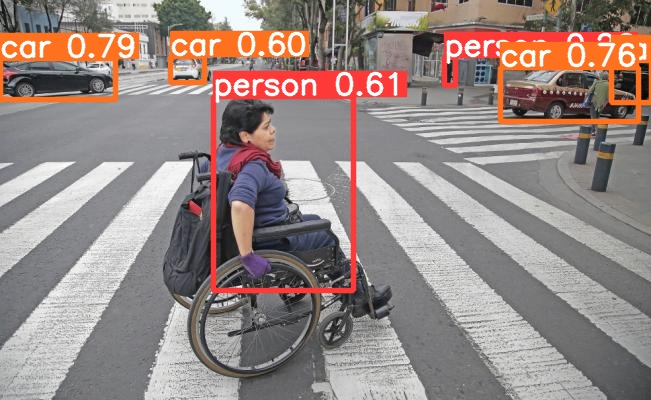

In [ ]:
%cd {HOME}
Image(filename='runs/detect/predict4/silla_calle.jpg', height=600)

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://www.madridatuestilo.com/wp-content/uploads/2019/05/silla-de-ruedas.jpg' save=True

/content
2023-04-30 04:10:18.103531: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
100% 26.2k/26.2k [00:00<00:00, 121kB/s] 
image 1/1 /content/silla-de-ruedas.jpg: 448x640 1 person, 60.6ms
Speed: 0.5ms pre-process, 60.6ms inference, 87.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict5


/content


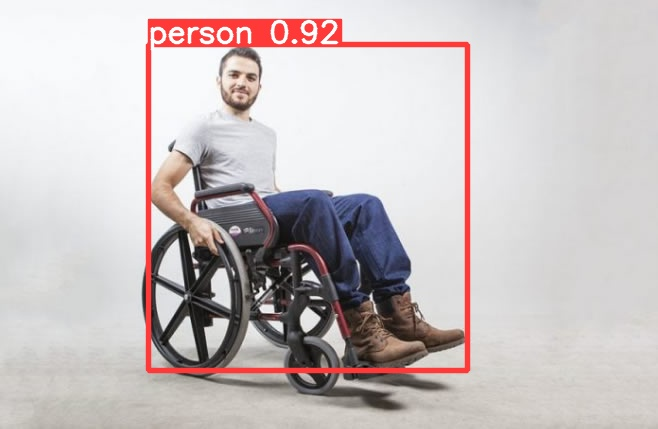

In [ ]:
%cd {HOME}
Image(filename='runs/detect/predict5/silla-de-ruedas.jpg', height=600)

#### Video

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/drive/MyDrive/Prueba_red_neuronal/Video_silla_de_ruedas.mp4

2023-04-30 04:10:59.797369: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
video 1/1 (1/1140) /content/drive/MyDrive/Prueba_red_neuronal/Video_silla_de_ruedas.mp4: 480x800 1 wheelchair_road_user, 94.8ms
video 1/1 (2/1140) /content/drive/MyDrive/Prueba_red_neuronal/Video_silla_de_ruedas.mp4: 480x800 1 wheelchair_road_user, 15.5ms
video 1/1 (3/1140) /content/drive/MyDrive/Prueba_red_neuronal/Video_silla_de_ruedas.mp4: 480x800 1 wheelchair_road_user, 15.5ms
video 1/1 (4/1140) /content/drive/MyDrive/Prueba_red_neuronal/Video_silla_de_ruedas.mp4: 480x800 1 wheelchair_road_user, 16.3ms
video 1/1 (5/1140) /content/drive/MyDrive/Prueba_red_neuronal/Video_silla_de_ruedas.mp4: 480x800 1 wheelchair_road_user, 15.4ms
video 1/1 (6/1140) /content/drive/MyDrive/Prueba_red_neuronal/Video_